In [1]:
import numpy as np
from scipy import stats as st

import pandas as pd 
from pandas import Series , DataFrame as df

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Data Anlaysis & Feature Engineering

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Name
the name itself doesn't contribute alot but the title might be valuable

In [7]:
def extract_title(dataset ,name_column = 'Name'):
    return dataset[name_column].str.extract('([a-zA-z]+)\.')

#extract title for train and test data
train_df['Title'] = extract_title(train_df)
test_df['Title'] = extract_title(test_df)

now we want to inspect the influence that the title has over the class

In [8]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Sir           1
Capt          1
Mme           1
Countess      1
Lady          1
Don           1
Jonkheer      1
Name: Title, dtype: int64

now we will encode the title to prepare it for entering the model.

ps: most of the instances fall within the top 4 classes and the others are very rare so will replace them all with a rare class

In [9]:
from sklearn.preprocessing import OrdinalEncoder

def ord_encode_feature(data, feature, limit = 0, rare_class = 'rare'):
    ord_enc = OrdinalEncoder()

    # removing the rare classes 
    if limit > 0 :
        limit_feature = lambda x : x if x in data[feature].value_counts().index[:limit] else rare_class
        data[feature] = data[feature].apply(limit_feature)

    #encoding 
    cats = ord_enc.fit_transform(data[feature].values.reshape(-1, 1))
    data[feature] = Series(cats.flatten())

ord_encode_feature(train_df, 'Title', 4)
ord_encode_feature(test_df, 'Title', 4)

In [10]:
train_df.head()
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.0


now let's plot the feature against the labels

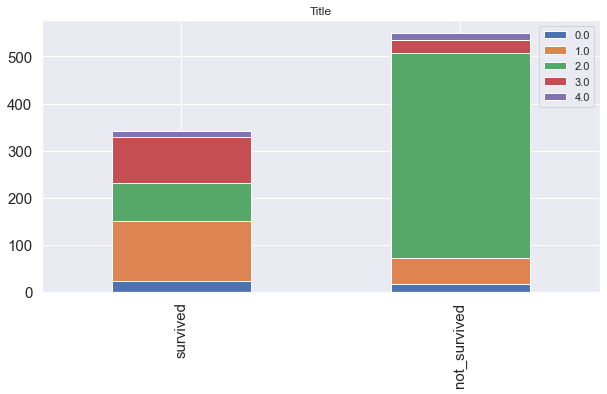

In [11]:
def plot_feature_chart(dataset, feature,kind = 'bar', stacked = True, figsize = (10, 5)):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    not_survived = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,not_survived])
    df.index = ['survived','not_survived']
    df.plot(kind = kind, stacked = stacked , figsize = figsize , title = feature , fontsize = 15)
    
plot_feature_chart(train_df, 'Title')

### Age
let's inspect the relationship between age and survival

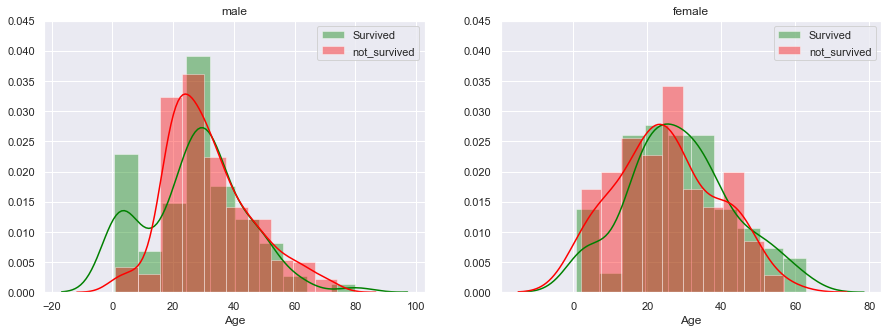

In [12]:
def plot_age_sex(data, ax, sex, bins = 10, colors = ['green','red']):
    sex_df = train_df[train_df['Sex'] == sex]
    sns.distplot(sex_df[sex_df['Survived'] == 1].Age.dropna(), ax = ax, color=colors[0], bins=bins, label = 'Survived')
    sns.distplot(sex_df[sex_df['Survived'] == 0].Age.dropna(), ax = ax, color=colors[1], bins=bins, label = 'not_survived')
    ax.legend()
    ax.set_title(sex)
    
fig, axes = plt.subplots(1,2,figsize=(15,5))
for ax in axes : ax.set_ylim(0,.045)
plot_age_sex(train_df, axes[0], 'male')
plot_age_sex(train_df, axes[1], 'female')

we can see tha there is a relation between age and survival also we can gain some insights that can help us getting better predictions

- males younger than 15 years are more likely to survive than if they older while females older than 35 have the highest survival rates
- males between 20 to 40 have the lowest survival rates
- survival rates of males droppes after 55 while increases for females

based on the above insights we will choose the following bins to represent the data: (15,25,35,55,older)

but first we will going to handle the missing data in the feature Age

In [13]:
#filling missing values with the median of the dataset
train_df['Age'].fillna(train_df.groupby(['Sex'])['Age'].transform('median'), inplace=True)
test_df['Age'].fillna(test_df.groupby(['Sex'])['Age'].transform('median'), inplace=True)

In [14]:
#binning age
def bin_age(age):
    if age < 15 : return 0
    if age < 25 : return 1
    if age < 35 : return 2
    if age < 55 : return 3
    else : return 4
    
train_df['Age'] = train_df['Age'].apply(bin_age)
test_df['Age'] = test_df['Age'].apply(bin_age)

In [15]:
train_df.head()
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,NaN,S,2.0


### Sex
let's start by plotting the feature

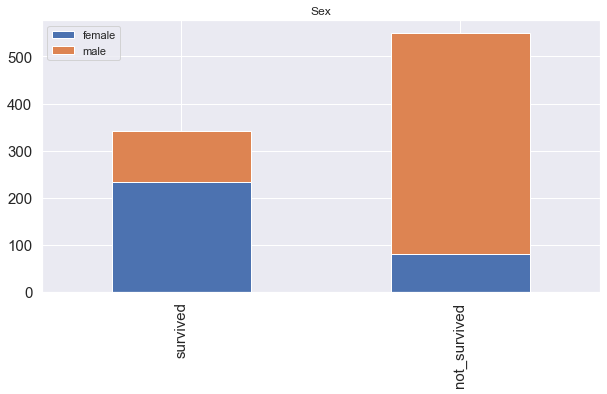

In [16]:
plot_feature_chart(train_df, 'Sex')

we can see that there is a relation between the sex and the chance to survive as "female" represnts the majority of the "survived" class as opposed to "male" who represnts the majority of "not_survived" class.

now we will encode the feature

In [17]:
ord_encode_feature(train_df,'Sex')
ord_encode_feature(test_df,'Sex')

In [18]:
train_df.head()
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1.0,1,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,3,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,2,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,3,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",1.0,3,0,0,373450,8.0500,NaN,S,2.0


### Pclass

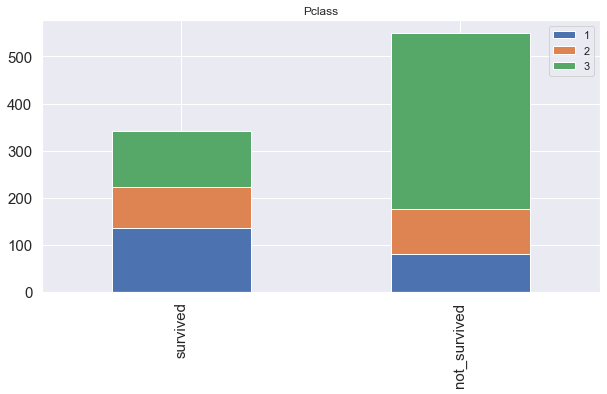

In [19]:
plot_feature_chart(train_df, 'Pclass')

we can see that there is a higher survival rate for class 1 and lower for class 3

let's encode the feature

In [20]:
ord_encode_feature(train_df,'Pclass')
ord_encode_feature(test_df,'Pclass')

In [21]:
train_df.head()
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,2.0,"Braund, Mr. Owen Harris",1.0,1,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,3,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,2.0,"Heikkinen, Miss. Laina",0.0,2,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,3,1,0,113803,53.1000,C123,S,3.0
4,5,0,2.0,"Allen, Mr. William Henry",1.0,3,0,0,373450,8.0500,NaN,S,2.0


### Embarked

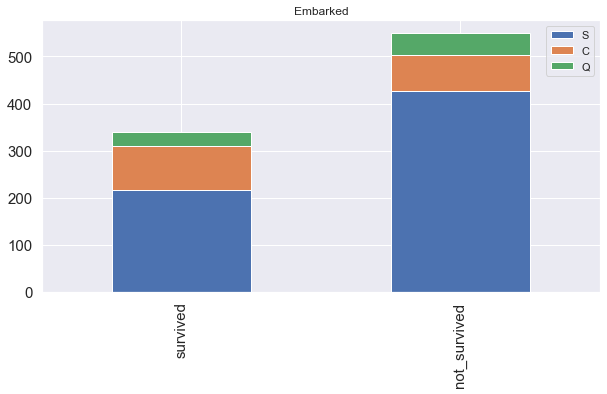

In [22]:
plot_feature_chart(train_df, 'Embarked')

In [23]:
#handling missing values (Replacing it with the MODE)
train_df['Embarked']= train_df.groupby('Title')['Embarked'].transform(lambda x:x.fillna(x.mode()[0]))
test_df['Embarked']= test_df.groupby('Title')['Embarked'].transform(lambda x:x.fillna(x.mode()[0]))

In [24]:
#Encoding
ord_encode_feature(train_df,'Embarked')
ord_encode_feature(test_df,'Embarked')

In [25]:
train_df.head()
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,2.0,"Braund, Mr. Owen Harris",1.0,1,1,0,A/5 21171,7.2500,NaN,2.0,2.0
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,3,1,0,PC 17599,71.2833,C85,0.0,3.0
2,3,1,2.0,"Heikkinen, Miss. Laina",0.0,2,0,0,STON/O2. 3101282,7.9250,NaN,2.0,1.0
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,3,1,0,113803,53.1000,C123,2.0,3.0
4,5,0,2.0,"Allen, Mr. William Henry",1.0,3,0,0,373450,8.0500,NaN,2.0,2.0


### Cabin

In [26]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

we will just use the class of the cabin

but first we will handle the missing values

In [27]:
#handling missing values (replacing it with unknown class)
train_df['Cabin'].fillna('unknown', inplace=True)
test_df['Cabin'].fillna('unknown', inplace=True)

#using the class of the cabin
train_df['Cabin'] = train_df['Cabin'].apply(lambda x:x[:1])
test_df['Cabin'] = test_df['Cabin'].apply(lambda x:x[:1])

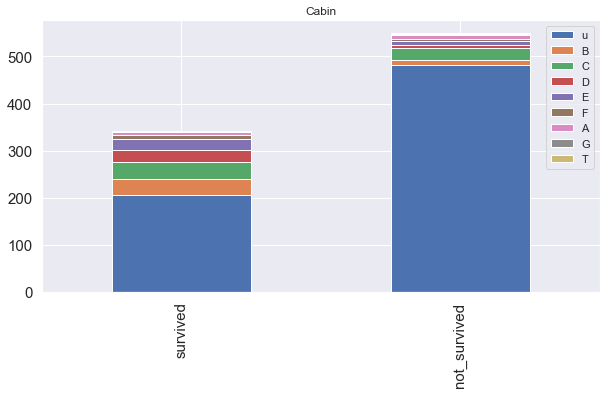

In [28]:
plot_feature_chart(train_df, 'Cabin')

In [29]:
train_df['Cabin'].value_counts()

u    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [30]:
survivals_cabin = len(train_df[train_df['Cabin'] != 'u'][train_df['Survived'] == 1]) / len(train_df[train_df['Cabin'] != 'u'])
non_survivals_cabin = len(train_df[train_df['Cabin'] != 'u'][train_df['Survived'] == 0]) / len(train_df[train_df['Cabin'] != 'u'])
survivals_no_cabin = len(train_df[train_df['Cabin'] == 'u'][train_df['Survived'] == 1]) / len(train_df[train_df['Cabin'] == 'u'])
non_survivals_no_cabin = len(train_df[train_df['Cabin'] == 'u'][train_df['Survived'] == 0]) / len(train_df[train_df['Cabin'] == 'u'])

print(f'Percentage of survivals with cabin from all who have capin = {survivals_cabin} %')
print(f'Percentage of non-survivals with cabin from all who have capin= {non_survivals_cabin} %')
print(f'Percentage of survivals with no cabin from all who don\'t have capin = {survivals_no_cabin} %')
print(f'Percentage of non-survivals with no cabin from all who don\'t have capin = {non_survivals_no_cabin} %')

Percentage of survivals with cabin from all who have capin = 0.6666666666666666 %
Percentage of non-survivals with cabin from all who have capin= 0.3333333333333333 %
Percentage of survivals with no cabin from all who don't have capin = 0.29985443959243085 %
Percentage of non-survivals with no cabin from all who don't have capin = 0.7001455604075691 %


we see that having cabin increase the probabilty of survival

we will group the feature into to groups capin/no capin and then we will encode them

In [31]:
#encoding
ord_encode_feature(train_df, 'Cabin', limit = 1) # not having cabin is the most common class so it will encoded as cabin / no cabin
ord_encode_feature(test_df, 'Cabin', limit = 1)

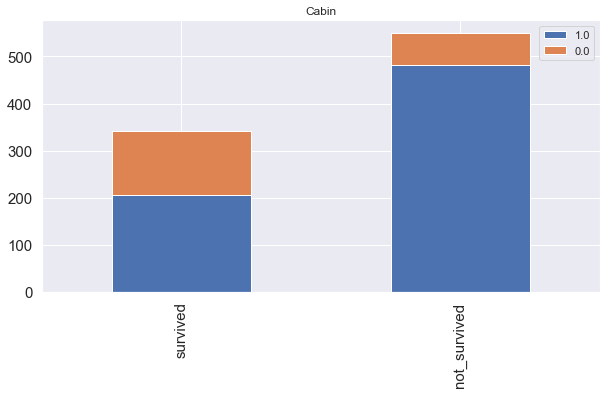

In [32]:
plot_feature_chart(train_df, 'Cabin')

In [33]:
train_df.head()
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,2.0,"Braund, Mr. Owen Harris",1.0,1,1,0,A/5 21171,7.2500,1.0,2.0,2.0
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,3,1,0,PC 17599,71.2833,0.0,0.0,3.0
2,3,1,2.0,"Heikkinen, Miss. Laina",0.0,2,0,0,STON/O2. 3101282,7.9250,1.0,2.0,1.0
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,3,1,0,113803,53.1000,0.0,2.0,3.0
4,5,0,2.0,"Allen, Mr. William Henry",1.0,3,0,0,373450,8.0500,1.0,2.0,2.0


### Fare

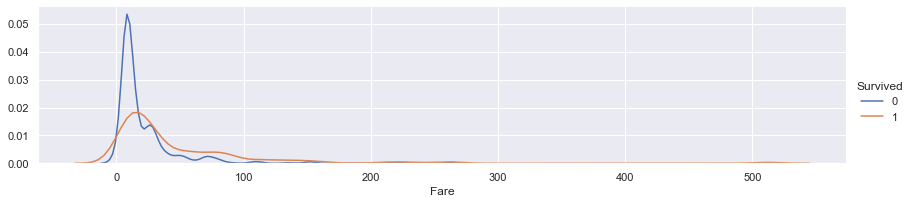

In [34]:
def plot_feature_kde(data,feature,xlim=None):
    plot = sns.FacetGrid(data,hue='Survived',aspect = 4)
    plot.map(sns.kdeplot,feature)
    if xlim:
        plot.set(xlim = xlim)
    plot.add_legend()
    
plot_feature_kde(train_df, 'Fare')

invistigating different ranges

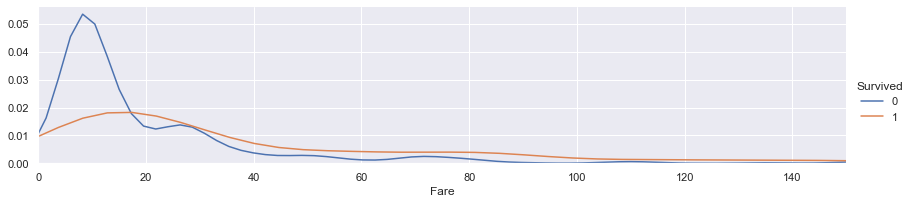

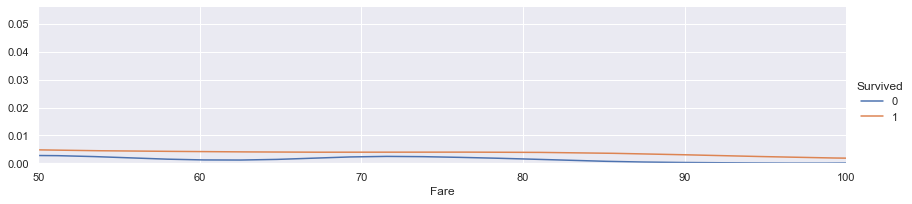

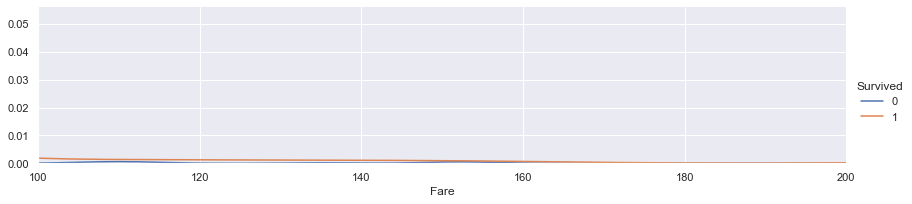

In [35]:
plot_feature_kde(train_df, 'Fare',xlim=(0,150))
plot_feature_kde(train_df, 'Fare',xlim=(50,100))
plot_feature_kde(train_df, 'Fare',xlim=(100,200))

In [36]:
#handling missing values
train_df['Fare'].fillna(train_df['Fare'].median(), inplace = True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [37]:
#binning
from sklearn.preprocessing import KBinsDiscretizer
def bin_feature(data, feature,n_bins = 5 ,encode = 'ordinal', strategy = 'uniform'):
    binner = KBinsDiscretizer(n_bins=n_bins , encode=encode, strategy=strategy)
    bins = binner.fit_transform(data[feature].values.reshape(-1, 1))
    data[feature] = Series(bins.flatten())

bin_feature(train_df, 'Fare')
bin_feature(test_df, 'Fare')

In [38]:
binner = KBinsDiscretizer(n_bins = 5 ,encode = 'ordinal', strategy = 'uniform')
binner.fit(train_df['Fare'].values.reshape(-1,1))


KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [39]:
train_df.head()
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,2.0,"Braund, Mr. Owen Harris",1.0,1,1,0,A/5 21171,0.0,1.0,2.0,2.0
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,3,1,0,PC 17599,0.0,0.0,0.0,3.0
2,3,1,2.0,"Heikkinen, Miss. Laina",0.0,2,0,0,STON/O2. 3101282,0.0,1.0,2.0,1.0
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,3,1,0,113803,0.0,0.0,2.0,3.0
4,5,0,2.0,"Allen, Mr. William Henry",1.0,3,0,0,373450,0.0,1.0,2.0,2.0


### Relevants (SibSp, ParCh)

In [40]:
train_df['Relevants'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Relevants'] = test_df['SibSp'] + test_df['Parch'] + 1

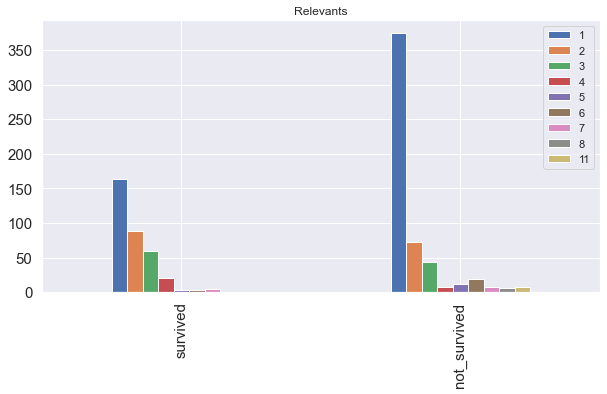

In [41]:
plot_feature_chart(train_df,'Relevants',stacked = False)

In [42]:
train_df.head()
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relevants
0,1,0,2.0,"Braund, Mr. Owen Harris",1.0,1,1,0,A/5 21171,0.0,1.0,2.0,2.0,2
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,3,1,0,PC 17599,0.0,0.0,0.0,3.0,2
2,3,1,2.0,"Heikkinen, Miss. Laina",0.0,2,0,0,STON/O2. 3101282,0.0,1.0,2.0,1.0,1
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,3,1,0,113803,0.0,0.0,2.0,3.0,2
4,5,0,2.0,"Allen, Mr. William Henry",1.0,3,0,0,373450,0.0,1.0,2.0,2.0,1


now we are going to drop the remaining features as it want be very helpfull

In [43]:
dropped = ['PassengerId','Name','SibSp','Parch','Ticket']
#dropped = ['PassengerId','Name','Ticket']

#preserving passenger id to use it to report data
passenger_id = test_df['PassengerId']

train_df.drop(dropped, axis = 1, inplace=True)
test_df.drop(dropped, axis = 1, inplace=True)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Relevants
0,0,2.0,1.0,1,0.0,1.0,2.0,2.0,2
1,1,0.0,0.0,3,0.0,0.0,0.0,3.0,2
2,1,2.0,0.0,2,0.0,1.0,2.0,1.0,1
3,1,0.0,0.0,3,0.0,0.0,2.0,3.0,2
4,0,2.0,1.0,3,0.0,1.0,2.0,2.0,1


## Modeling

In [44]:
#splitting features from targe
x_train = train_df.drop('Survived', axis = 1)
y_train = train_df['Survived']

In [45]:
#importing models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Evaluation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

### KNN

In [46]:
def eval_model(model,x_train,y_train):
    model_accuracy = cross_val_score(model, x_train, y_train, cv = kfold, n_jobs=3, scoring='accuracy')
    model_f1_score = cross_val_score(model, x_train, y_train, cv = kfold, n_jobs=3, scoring='f1')

    print(f'{type(model).__name__} F1 score = {np.mean(model_f1_score)}')
    print(f'{type(model).__name__} accuracy = {np.mean(model_accuracy)}')

knn = KNeighborsClassifier(n_neighbors=15)
eval_model(knn,x_train,y_train)

KNeighborsClassifier F1 score = 0.7414487414720531
KNeighborsClassifier accuracy = 0.8125593008739076


### Naive Bayes

In [47]:
nb = GaussianNB()
eval_model(nb,x_train,y_train)

GaussianNB F1 score = 0.724114461747481
GaussianNB accuracy = 0.7844694132334581


### Logistic Regression

In [48]:
lr = LogisticRegression()
eval_model(lr,x_train,y_train)

LogisticRegression F1 score = 0.7141785948346852
LogisticRegression accuracy = 0.7900374531835207


### Random Forests

In [49]:
rf = RandomForestClassifier(n_estimators=15)
eval_model(rf,x_train,y_train)

RandomForestClassifier F1 score = 0.7202950630436584
RandomForestClassifier accuracy = 0.8136204744069913


### Gradient Boosting

In [50]:
gb = GradientBoostingClassifier(n_estimators=15)
eval_model(gb,x_train,y_train)

GradientBoostingClassifier F1 score = 0.7488112589453628
GradientBoostingClassifier accuracy = 0.8338701622971285


### SVM

In [51]:
svc = SVC()
eval_model(svc,x_train,y_train)

SVC F1 score = 0.765354247180473
SVC accuracy = 0.8305118601747814


SVM model gives the best Accuracy While Gradient boosting gives the best F1 score so we will trying to tune them a bit

## Parameter Tunning

### SVM

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 80,100,150], 
              'gamma': [1, 0.1, 0.01,0.05, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 1)
  
# fitting the model
grid.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 80, 100, 150],
                         'gamma': [1, 0.1, 0.01, 0.05, 0.001],
                         'kernel': ['rbf']},
             verbose=1)

In [53]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [54]:
best_svm = grid.best_estimator_
eval_model(best_svm,x_train,y_train)

SVC F1 score = 0.772696821843819
SVC accuracy = 0.8361298377028714


### Gradeint boosting

In [55]:
# defining parameter range
param_grid = {
    'n_estimators':[10,11,12,13,14,15,16],
    'max_depth':[1,2,3,4,5,7],
    'max_features':[None,1,2,3,5,7,8,9],
    'learning_rate':[0.1,.1,.4,.5,.6,1,10],
    'min_samples_split':[1,2,3,5,10,15,20,25,30],
    'min_samples_leaf':[1,2,3,5,10,15,25,30,40,50,60],
}

rand = RandomizedSearchCV(gb, param_grid, refit = True,n_iter=2000, verbose = 1, n_jobs=8)

# fitting the model
rand.fit(x_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 1680 tasks      | elapsed:    9.6s
[Parallel(n_jobs=8)]: Done 5512 tasks      | elapsed:   30.1s
[Parallel(n_jobs=8)]: Done 6784 tasks      | elapsed:   37.5s
[Parallel(n_jobs=8)]: Done 9104 tasks      | elapsed:   47.7s
[Parallel(n_jobs=8)]: Done 10000 out of 10000 | elapsed:   51.0s finished


RandomizedSearchCV(estimator=GradientBoostingClassifier(n_estimators=15),
                   n_iter=2000, n_jobs=8,
                   param_distributions={'learning_rate': [0.1, 0.1, 0.4, 0.5,
                                                          0.6, 1, 10],
                                        'max_depth': [1, 2, 3, 4, 5, 7],
                                        'max_features': [None, 1, 2, 3, 5, 7, 8,
                                                         9],
                                        'min_samples_leaf': [1, 2, 3, 5, 10, 15,
                                                             25, 30, 40, 50,
                                                             60],
                                        'min_samples_split': [1, 2, 3, 5, 10,
                                                              15, 20, 25, 30],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         1

In [56]:
rand.best_params_

{'n_estimators': 11,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 2,
 'max_depth': 5,
 'learning_rate': 0.1}

In [57]:
best_gb = rand.best_estimator_
eval_model(best_gb,x_train,y_train)

GradientBoostingClassifier F1 score = 0.7433378138923997
GradientBoostingClassifier accuracy = 0.8260174781523096


SVM gives better result

In [58]:
clf = best_svm

## Test Set

In [59]:
prediction = clf.predict(test_df)
submission = df({
    'PassengerId':passenger_id,
    'Survived':prediction
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [60]:
submission.to_csv('submission.csv', index=False)